dataset: https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

## BUSSINESS UNDERSTANDING

Dataset Informasi Kartu Kredit Pelanggan yang dapat digunakan untuk Mengidentifikasi Pelanggan Setia, Segmentasi Pelanggan, Pemasaran Bertarget, dan kasus penggunaan lainnya di Industri Pemasaran.

Pengklusteran atau pembagian kelompok pelanggan berfungsi untuk menentuan sasaran pemasaran suatu produk yang tepat. Dengan dilakukannya proses pengelompokan pelanggan berdasarkan transaksi yang telah pelanggan lakukan, akan mempermudah dalam melakukan prediksi strategi pasar kedepannya.

Maka dari itu, perlu dibuatkannya model yang mampu mempermudah dalam melakukan proses pengelompokan pelanggan. Model ini dibuat untuk mempermudah proses pengelompokan nasabah bank pengguna kartu kredit yang menggunakan metode clustering dengan algoritma KMeans.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('credit.csv')

# DATA UNDERSTANDING

deskripsi dataset:

Sl_No = Berfungsi untuk mengindeks nilaiNomor Identifikasi Seri Pelanggan

Customer Key = ID pelanggan

AvgCreditLimit = Rata-rata Limit Kartu Kredit Untuk Nasabah

TotalCreditCards = Jumlah Kartu Kredit yang Dimiliki Nasabah

Totalvisitsbank = Jumlah Kunjungan Nasabah ke Bank oleh Nasabah

Totalvisitsonline = Total Kunjungan Online oleh Nasabah Bank

Totalcallsmade = Jumlah Panggilan yang Dilakukan oleh Nasabah ke Bank

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.shape

(660, 7)

In [6]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
df.duplicated().sum()

0

# DATA PREPROSESSING

<ipython-input-9-0b9bd1603abb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature]) #Checking the distributions of the interactions


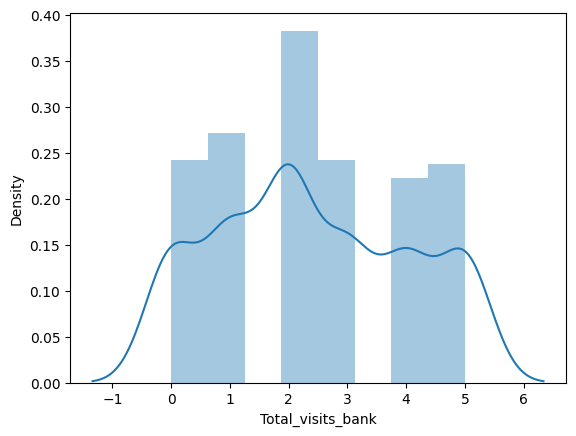

<ipython-input-9-0b9bd1603abb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature]) #Checking the distributions of the interactions


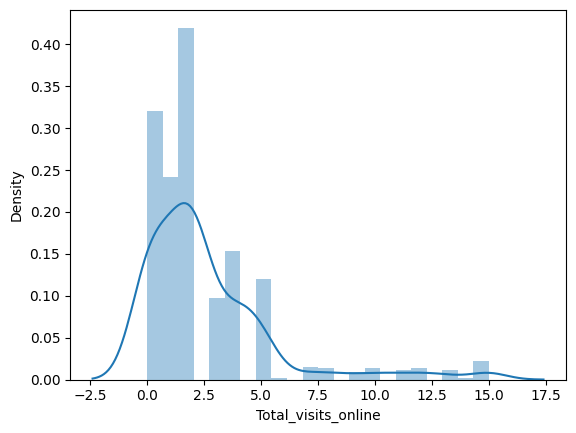

<ipython-input-9-0b9bd1603abb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature]) #Checking the distributions of the interactions


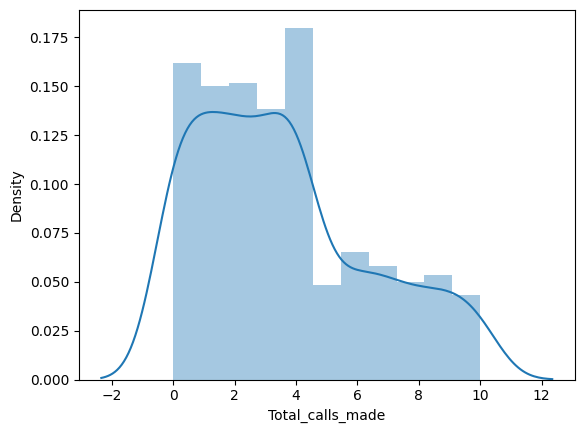

In [9]:
features = ['Total_visits_bank','Total_visits_online','Total_calls_made']
for feature in features:
    sns.distplot(df[feature]) #Checking the distributions of the interactions
    plt.show()

# MODELLING

In [10]:
X = df.drop(['Sl_No','Customer Key'], axis=1)

In [11]:
print(X)

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  
0                      1                 0  
1                     10                 9  
2                      3                 4  
3                      1                 4  
4     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

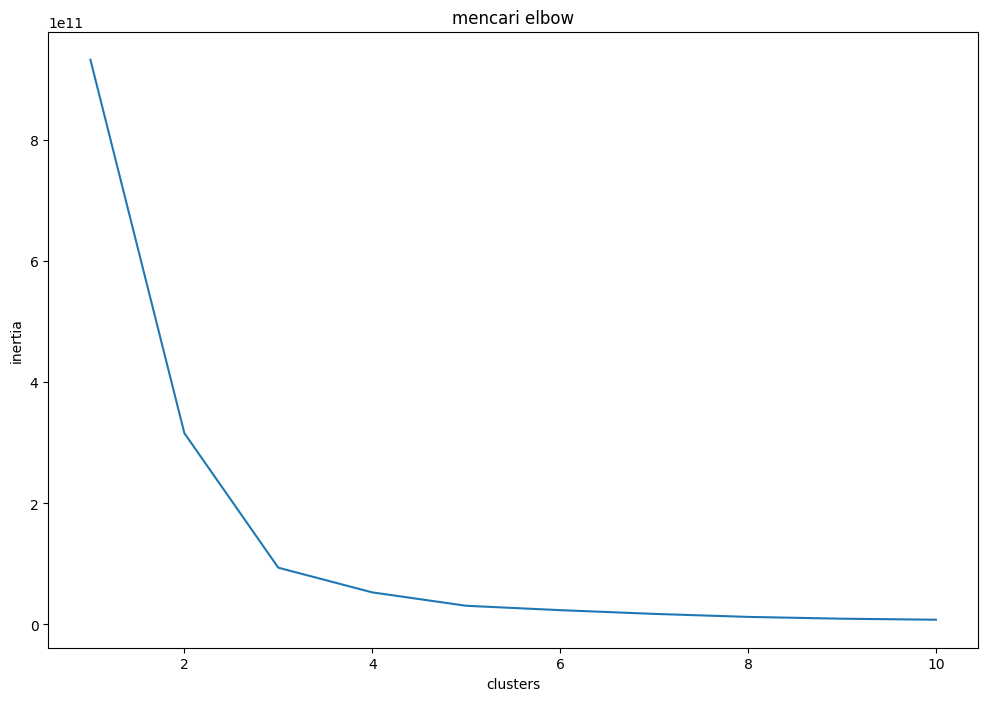

In [12]:
clusters=[]
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

In [13]:
n_clust = 2
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


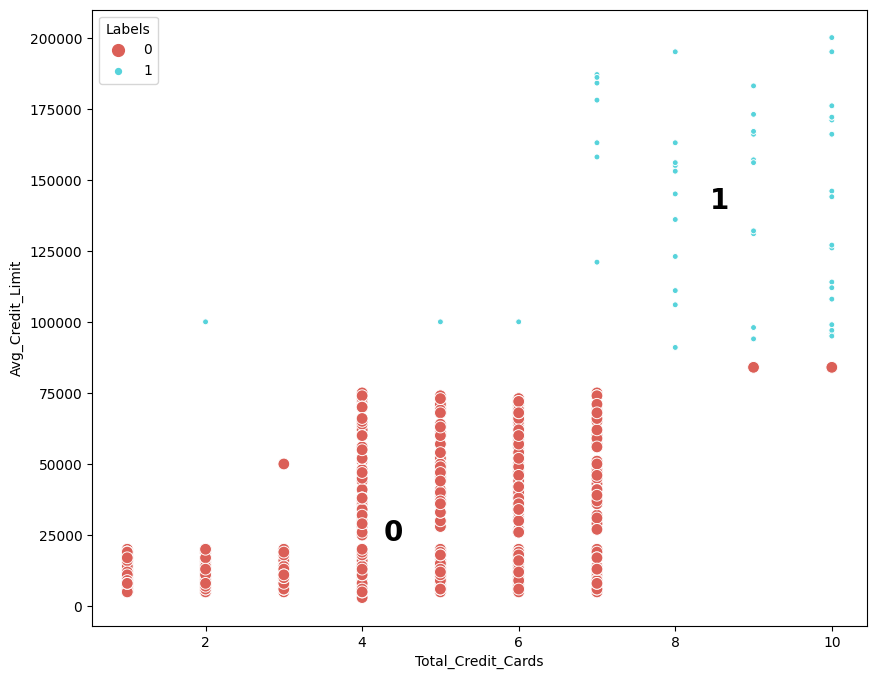

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Total_Credit_Cards', y='Avg_Credit_Limit', hue='Labels', markers=True, size='Labels', palette=sns.color_palette('hls', n_clust))

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels'] == label]['Total_Credit_Cards'].mean(),
                  X[X['Labels'] == label]['Avg_Credit_Limit'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.show()

In [16]:
print(X)

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  Labels  
0                      1                 0       1  
1                     10                 9       0  
2                      3                 4       0  
3                  

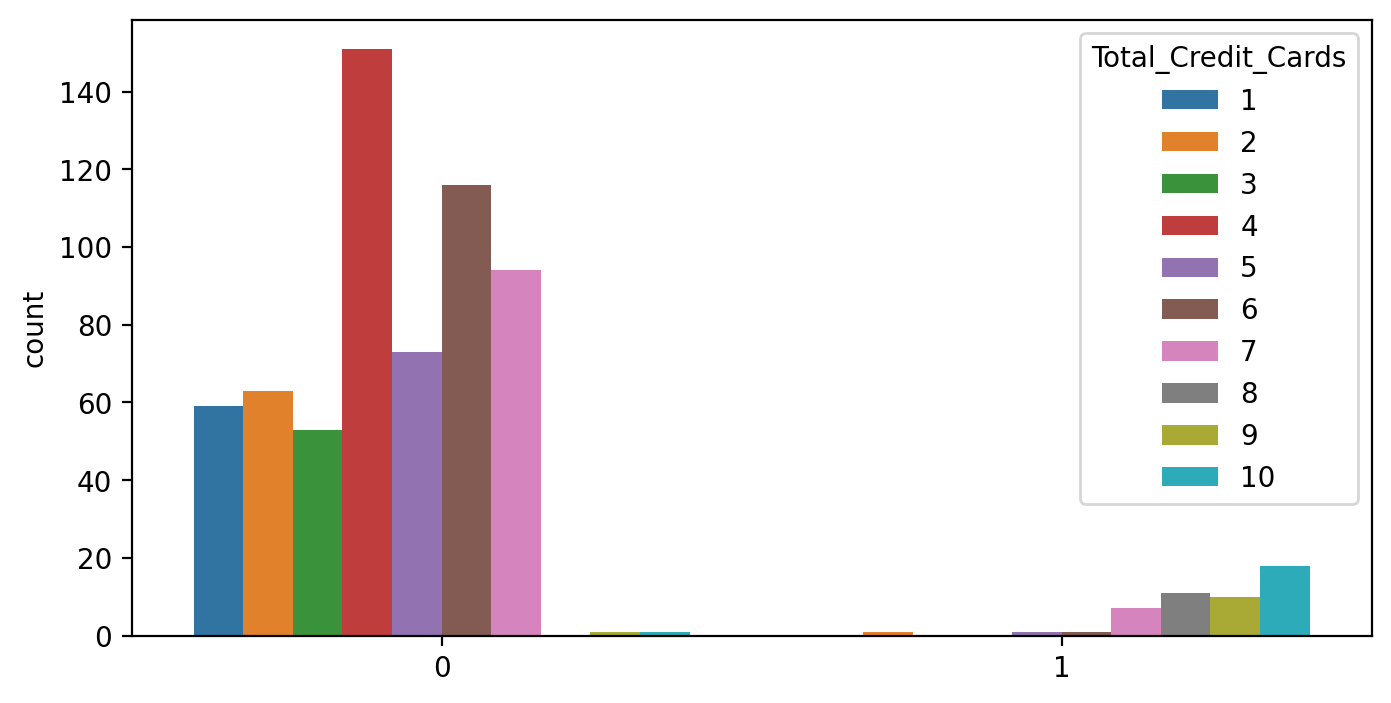

In [17]:
plt.figure(figsize=(8, 4), dpi=200)
sns.countplot(data=df, x=kmean.labels_, hue='Total_Credit_Cards')
plt.show()

In [18]:
X.to_excel('output_cluster.xlsx')